<a href="https://colab.research.google.com/github/Miron-Hanukaiev/Introduction_to_Cloud_Computing/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Data Overview ===
                         count unique                top   freq  \
_id                    50000.0    NaN                NaN    NaN   
mispar_rechev          50000.0    NaN                NaN    NaN   
tozeret_cd             50000.0    NaN                NaN    NaN   
sug_degem                50000      2                  P  46327   
tozeret_nm               50000    124         טויוטה יפן   4562   
degem_cd               50000.0    NaN                NaN    NaN   
degem_nm                 50000   1365              DH41C   1545   
ramat_gimur                1.0    NaN                NaN    NaN   
ramat_eivzur_betihuty   1705.0    NaN                NaN    NaN   
kvutzat_zihum          41994.0    NaN                NaN    NaN   
shnat_yitzur           50000.0    NaN                NaN    NaN   
degem_manoa              50000    666                3ZZ   3777   
mivchan_acharon_dt       50000    759         2025-01-13    362   
tokef_dt                 50000    803   

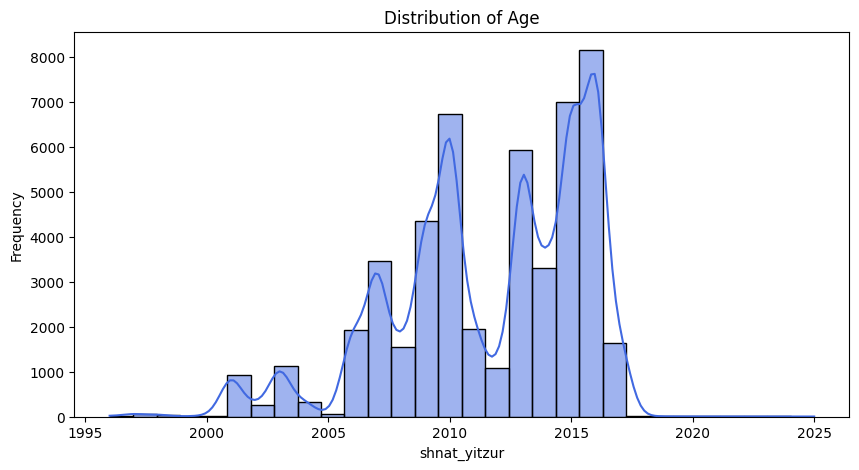

In [5]:
# ============================
# Import packages
# ============================
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ============================
# Download data from API
# ============================
url = "https://data.gov.il/api/3/action/datastore_search?resource_id=053cea08-09bc-40ec-8f7a-156f0677aff3&limit=50000"

response = requests.get(url).json()
records = response["result"]["records"]
df = pd.DataFrame(records)

# ============================
# Clean numeric columns
# ============================
numeric_cols = ["shnat_yitzur", "mispar_rechev", "kvuzat_zihum", "ramat_gimur"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df.dropna(subset=["shnat_yitzur"], inplace=True)

# ============================
# TAB 1 – Statistics Table
# ============================
print("=== Data Overview ===")
print(df.describe(include="all").transpose())

# ============================
# TAB 2 – Histogram (exactly like exercise picture)
# ============================
print("\nHistogram of Production Year:")

plt.figure(figsize=(10, 5))
sns.histplot(df["shnat_yitzur"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Age")
plt.xlabel("shnat_yitzur")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# ============================
# TAB 3 – Bar Chart: Vehicles per year
# ============================
vehicles_per_year = df["shnat_yitzur"].value_counts().sort_index()

fig_bar = px.bar(
    x=vehicles_per_year.index,
    y=vehicles_per_year.values,
    labels={"x": "Production Year", "y": "Number of Vehicles"},
    title="Vehicle Count per Production Year"
)
fig_bar.show()

# ============================
# Sunburst Chart
# ============================
df_small = df[["tozeret_nm", "ramat_gimur", "shnat_yitzur"]].dropna()

fig_sun = px.sunburst(
    df_small,
    path=["tozeret_nm", "ramat_gimur", "shnat_yitzur"],
    title="Sunburst – Manufacturer → Trim Level → Year"
)
fig_sun.show()

# ============================
# Heatmap (optional feature)
# ============================
heat_df = df_small.groupby(["tozeret_nm", "shnat_yitzur"]).size().reset_index(name="count")

fig_heat = px.density_heatmap(
    heat_df,
    x="shnat_yitzur",
    y="tozeret_nm",
    z="count",
    color_continuous_scale="Viridis",
    title="Vehicle Density Heatmap"
)
fig_heat.show()
